In [1]:
# Bangalore House Price Prediction - Supervised Regression Problem

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# Load Dataset
df = pd.read_csv("Bengaluru_House_Data.csv")

In [4]:
#Shape of data
df.shape

(13320, 9)

In [5]:
#size of data
df.size

119880

In [6]:
#Print first 5 rows
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
#print last 5 rows
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [8]:
#EDA-Exploratory Data Analysis
#Total Information that we have: 
print('total info:',list(df.columns))

total info: ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft', 'bath', 'balcony', 'price']


In [9]:
#Information of Data
df.info()
#bath,balcony,price -> Numeric
#area_type,area_type,availability,location,size, society, total_sqft -> Object Type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [10]:
df.describe()
#Max ->3600 Lakhs
#Min->8 Lakhs 

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [11]:
#Finding Unique Values of All Features
def unique_val(x):
    for i in x.columns:
        print(x[i].value_counts())
        print("------------------------")
unique_val(df)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
------------------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
------------------------
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
------------------------
si

In [12]:
#Cleaning the Data for ML
df.isnull().sum() #findind the missing values inside the dataset

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [13]:
df.isnull().mean()*100
#Soceity has 41% of missing Values so it needs to be dropped


area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [14]:
#drop society feature
df2=df.drop('society',axis='columns')
df2.shape

(13320, 8)

In [15]:
#Balcony misses 4.5% Value which can be optimized by using the mean values 
df2['balcony']=df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [16]:
df2.shape

(13320, 8)

In [17]:
#Now Very Few variables have missing value. We can Drop those Values.
df3=df2.dropna()
df3.shape

(13246, 8)

In [18]:
df.shape

(13320, 9)

In [19]:
# df4.shape,df5.shape,df6.shape,df7.shape,df8.shape,df9.shape,df10.shape,df11.shape,df12.shape,df13.shape,df14.shape,df15.shape,df16.shape,df17.shape

In [20]:
df3.isnull().sum() #No Null Values Data is cleaned

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [21]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [22]:
#Feature Engineering
#to show all rows and columns
#pd.set_option("display.max_columns",None)
#pd.set_option("display.max_rows",None)
df3

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.000000,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.00


In [23]:
df3['total_sqft'].value_counts() 
#Here total_sqft is in the object/string datatype we need to convert it into the numeric type 
#It contains :range values,numbers and strings, Float and Int Data.
# Convert all of them into Numberic Type

total_sqft
1200    843
1100    221
1500    204
2400    195
600     180
       ... 
5985      1
3580      1
2461      1
1437      1
4689      1
Name: count, Length: 2067, dtype: int64

In [24]:
#converting the Square Ft into Numeric Value
total_sqft_int = []
for str_val in df3['total_sqft']:
  try:
    total_sqft_int.append(float(str_val)) # if '123.4' like this value in str then conver in float
  except:
    try:
      temp = []
      temp = str_val.split('-')
      total_sqft_int.append((float(temp[0])+float(temp[-1]))/2) # '123 - 534' this str value split and take mean
    except:
      total_sqft_int.append(np.nan)

In [25]:
# Displaying the result
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [26]:
#reset index 
df4=df3.reset_index(drop=True) #Old Index Changed

In [27]:
df5=df4.join(pd.DataFrame({'total_sqft_int':total_sqft_int})) #joining the sqft in Int 
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [28]:
df5.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
13241,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0
13242,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0
13243,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0
13244,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0
13245,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0


In [29]:
df5.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [30]:
#Removing the missing values
df6=df5.dropna()

In [31]:
df6.isnull().sum() #All Missing Values Removed

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
total_sqft_int    0
dtype: int64

In [32]:
df6.info()
#We have to now work on size variable as it should be also in Numeric Data

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   availability    13200 non-null  object 
 2   location        13200 non-null  object 
 3   size            13200 non-null  object 
 4   total_sqft      13200 non-null  object 
 5   bath            13200 non-null  float64
 6   balcony         13200 non-null  float64
 7   price           13200 non-null  float64
 8   total_sqft_int  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [33]:
df6['size'].value_counts()

size
2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [34]:
df6['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [35]:
#We want only the Prefix Eg. Number [2,4,1]
size_int = []
for str_val in df6['size']:
  temp=[]
  temp = str_val.split(" ")
  try:
    size_int.append(int(temp[0]))
  except:
    size_int.append(np.nan)
    print("Noice = ",str_val)

In [36]:
df6=df6.reset_index(drop=True)

In [37]:
#join df6 with size_int
df7=df6.join(pd.DataFrame({'bhk':size_int}))

In [38]:
df7.shape

(13200, 10)

In [39]:
df7.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2


In [40]:
df7.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
13195,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0,5
13196,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0,4
13197,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0,2
13198,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0,4
13199,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0,1


In [41]:
#Finding Outliners and removing them

In [42]:
#lets consider 1 BHK = 350 SQ. FT. Minimum
df7[df7['total_sqft_int']/df7['bhk'] < 350].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0,8
57,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.0,1407.0,6


In [43]:
# if 1 BHK total_sqft are < 350 then we ae going to remove them
df8 = df7[~(df7['total_sqft_int']/df7['bhk'] < 350)]
df8.shape

(12106, 10)

In [44]:
#Price Per Feet 
df8.loc[:, 'price_per_sqft'] = df8['price'] * 100000 / df8['total_sqft_int']


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7928\4253298119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8.loc[:, 'price_per_sqft'] = df8['price'] * 100000 / df8['total_sqft_int']


In [45]:
df8.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [46]:
df8.price_per_sqft.describe()

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [47]:
#here we can see huge difference between min and max price_per_sqft
# min 6308.502826 max 176470.588235
 
# Removing outliers using help of 'price per sqrt'  taking std and mean per location
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out
 
df9 = remove_pps_outliers(df8)
df9.shape

(8888, 11)

In [48]:
# Removing BHK outliers
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]}
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')
 
df10 = remove_bhk_outliers(df9)
df10.shape

(7194, 11)

In [49]:
df10.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  9.,  6.,  7., 12.])

In [50]:
df10[df10.bath > df10.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
1861,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460,7.0,2.000000,80.0,2460.0,4,3252.032520
5836,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000,8.0,1.584376,450.0,7000.0,4,6428.571429
7098,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,11338,9.0,1.000000,1000.0,11338.0,6,8819.897689
7569,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806,6.0,2.000000,116.0,1806.0,3,6423.034330


In [51]:
# here we are considering data only total no. bathroom =  bhk + 1
df11 = df10[df10.bath < df10.bhk+2]
df11.shape

(7120, 11)

In [52]:
df11.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200,2.0,2.0,83.0,1200.0,2,6916.666667


In [53]:
#Remove Categorical Variable
df12 = df11.drop(['area_type', 'availability',"location","size","total_sqft"], axis =1)
df12.head()
df12.to_csv("clean_data.csv", index=False)

In [54]:
df13 = df11.drop(["size","total_sqft"], axis =1)
df13.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667


In [55]:
#One Hot Encoding
df14 = pd.get_dummies(df13, drop_first=True, columns=['area_type','availability','location'])
df14.shape
df14.to_csv('oh_encoded_data.csv', index=False)

In [56]:
df14.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_15-Jun,...,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yemlur,location_Yeshwanthpur,location_Yeshwanthpur Industrial Suburb,location_frazertown,location_manyata park,location_tc.palya
0,3.0,2.0,150.0,1672.0,3,8971.291866,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,3.0,149.0,1750.0,3,8514.285714,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3.0,2.0,150.0,1750.0,3,8571.428571,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2.0,2.0,40.0,1250.0,2,3200.000000,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,2.0,2.0,83.0,1200.0,2,6916.666667,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:

"""In ['area_type','availability','location'] contain multiple classes and if we convert them into OHE so it increases the size of DF 
so try to use those classes which are *frequently* present in the car var"""

"In ['area_type','availability','location'] contain multiple classes and if we convert them into OHE so it increases the size of DF \nso try to use those classes which are *frequently* present in the car var"

In [58]:
#Working on area type
df13['area_type'].value_counts() # There are 4 types of Area Type

area_type
Super built-up  Area    5345
Built-up  Area          1298
Plot  Area               441
Carpet  Area              36
Name: count, dtype: int64

In [59]:
#Applying OHE
df15 = df13.copy()
for cat_var in ["Super built-up  Area","Built-up  Area","Plot  Area"]:
  df15["area_type"+cat_var] = np.where(df15['area_type']==cat_var, 1,0)


In [60]:
df15.shape
 


(7120, 12)

In [61]:
df15.head(2)

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0


In [62]:
#Working on availability feature
df15['availability'].value_counts() # We can convert it into two types

availability
Ready To Move    5644
18-Dec            159
18-May            156
18-Apr            154
18-Aug            118
                 ... 
15-Dec              1
16-Sep              1
20-Apr              1
17-Jan              1
16-Jul              1
Name: count, Length: 71, dtype: int64

In [63]:
#Ready to move 1, Dates - 0
df15["availability_Ready To Move"] = np.where(df15["availability"]=="Ready To Move",1,0)
df15.shape

(7120, 13)

In [64]:
df15.tail()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
8883,Super built-up Area,Ready To Move,frazertown,3.0,2.0,325.00,2900.0,3,11206.896552,1,0,0,1
8884,Super built-up Area,18-Nov,manyata park,3.0,1.0,84.83,1780.0,3,4765.730337,1,0,0,0
8885,Plot Area,Ready To Move,tc.palya,2.0,1.0,48.00,880.0,2,5454.545455,0,0,1,1
8886,Plot Area,18-Apr,tc.palya,2.0,1.0,55.00,1000.0,2,5500.000000,0,0,1,0
8887,Plot Area,18-Apr,tc.palya,2.0,1.0,78.00,1400.0,3,5571.428571,0,0,1,0


In [65]:
#Working on location
location_value_count = df15['location'].value_counts()
location_value_count

location
Whitefield               234
Sarjapur  Road           183
Electronic City          158
Marathahalli             116
Raja Rajeshwari Nagar    116
                        ... 
Postal Colony              1
Cleveland Town             1
Prashanth Nagar            1
Church Street              1
Rajarajeshwari nagar       1
Name: count, Length: 742, dtype: int64

In [66]:
location_gert_20 = location_value_count[location_value_count>=20].index
location_gert_20

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Marathahalli',
       'Raja Rajeshwari Nagar', 'Haralur Road', 'Hennur Road',
       'Bannerghatta Road', 'Uttarahalli', 'Thanisandra',
       'Electronic City Phase II', 'Hebbal', 'Yelahanka', '7th Phase JP Nagar',
       'Kanakpura Road', 'KR Puram', 'Sarjapur', 'Rajaji Nagar', 'Bellandur',
       'Kasavanhalli', 'Begur Road', 'Banashankari', 'Kothanur', 'Hormavu',
       'Harlur', 'Akshaya Nagar', 'Electronics City Phase 1', 'Jakkur',
       'Varthur', 'HSR Layout', 'Hennur', 'Ramamurthy Nagar', 'Chandapura',
       'Koramangala', 'Kaggadasapura', 'Kundalahalli', 'Ramagondanahalli',
       'Budigere', 'Hulimavu', 'Hoodi', 'Malleshwaram', 'Hegde Nagar',
       'Yeshwanthpur', 'Gottigere', '8th Phase JP Nagar', 'JP Nagar',
       'Channasandra', 'Bisuvanahalli', 'Vittasandra', 'Indira Nagar',
       'Old Airport Road', 'Sahakara Nagar', 'Brookefield', 'Kengeri',
       'Hosa Road', 'Vijayanagar', 'Balagere', 'Green Glen Layout

In [67]:
# OHE to location with 20 or more Locations
df16 = df15.copy()
for cat_var in location_gert_20:
  df16['location_'+cat_var]=np.where(df16['location']==cat_var, 1,0)
df16.shape

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7928\3853013558.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df16['location_'+cat_var]=np.where(df16['location']==cat_var, 1,0)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7928\3853013558.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df16['location_'+cat_var]=np.where(df16['location']==cat_var, 1,0)


(7120, 111)

In [68]:
df16.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_Hosur Road,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Domlur,location_Horamavu Banaswadi,location_Tumkur Road,location_Mahadevpura
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,...,0,0,0,0,0,0,0,0,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,1,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,1,...,0,0,0,0,0,0,0,0,0,0
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
#Drop Categorical Columns as these are converted into OHE
df17 = df16.drop(["area_type","availability",'location'], axis =1)
df17.shape

(7120, 108)

In [70]:
df17.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_Hosur Road,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Domlur,location_Horamavu Banaswadi,location_Tumkur Road,location_Mahadevpura
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df17.to_csv('ohe_data_reduce_cat_class.csv', index=False)

In [72]:
df_new = pd.read_csv('oh_encoded_data.csv')

In [73]:
df_new.shape
 
df_new.head()
 

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_15-Jun,...,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yemlur,location_Yeshwanthpur,location_Yeshwanthpur Industrial Suburb,location_frazertown,location_manyata park,location_tc.palya
0,3.0,2.0,150.0,1672.0,3,8971.291866,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,3.0,149.0,1750.0,3,8514.285714,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3.0,2.0,150.0,1750.0,3,8571.428571,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2.0,2.0,40.0,1250.0,2,3200.000000,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2.0,2.0,83.0,1200.0,2,6916.666667,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
#Spliting the Data- Train and Test Model
 
X = df_new[["bath","balcony","total_sqft_int",'bhk','price_per_sqft',]]
y = df_new['price']
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X =  (7120, 5)
Shape of y =  (7120,)
Shape of X_train =  (5696, 5)
Shape of y_train =  (5696,)
Shape of X_test =  (1424, 5)
Shape of y_test =  (1424,)


In [75]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

In [76]:
#ML Linear Regression
 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#lr = LinearRegression()
lr = LinearRegression(positive=True)
 
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))
 
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test) 
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score, lr_rmse

(0.896881828940552, 34.21572778618021)

In [77]:
print("New Intercept:", lr.intercept_)
print("New Coefficients:", lr.coef_)

New Intercept: 96.10553809691012
New Coefficients: [ 0.          0.         73.9575928   0.         56.69296101]


In [78]:
df_new.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_15-Jun,...,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yemlur,location_Yeshwanthpur,location_Yeshwanthpur Industrial Suburb,location_frazertown,location_manyata park,location_tc.palya
0,3.0,2.0,150.0,1672.0,3,8971.291866,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,3.0,149.0,1750.0,3,8514.285714,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3.0,2.0,150.0,1750.0,3,8571.428571,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2.0,2.0,40.0,1250.0,2,3200.000000,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2.0,2.0,83.0,1200.0,2,6916.666667,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
def predict():
     
    #take data from form and store in each feature    
    input_features = [x for x in request.form.values()]
    bath = input_features[0]
    balcony = input_features[1]
    total_sqft_int = input_features[2]
    bhk = input_features[3]
    price_per_sqft = input_features[4]
    area_type = input_features[5]
    availability = input_features[6]
    location = input_features[7]
     
    # predict the price of house by calling model.py
    predicted_price = model.predict_house_price(bath,balcony,total_sqft_int,bhk,price_per_sqft,area_type,availability,location)  

In [80]:
list(X.columns)
 
# it help to get predicted value of hosue  by providing features value 
def predict_house_price(model,bath,balcony,total_sqft_int,bhk,price_per_sqft,area_type,availability,location):
 
  x =np.zeros(len(X.columns)) # create zero numpy array, len = 107 as input value for model
 
  # adding feature's value accorind to their column index
  x[0]=bath
  x[1]=balcony
  x[2]=total_sqft_int
  x[3]=bhk
  x[4]=price_per_sqft
 
  if "availability"=="Ready To Move":
    x[8]=1
 
  if 'area_type'+area_type in X.columns:
    area_type_index = np.where(X.columns=="area_type"+area_type)[0][0]
    x[area_type_index] =1
 
    #print(area_type_index)
 
  if 'location_'+location in X.columns:
    loc_index = np.where(X.columns=="location_"+location)[0][0]
    x[loc_index] =1
 
    #print(loc_index)
 
  #print(x)
 
  # feature scaling
  x = sc.transform([x])[0] # give 2d np array for feature scaling and get 1d scaled np array
  #print(x)
 
  return model.predict([x])[0] # return the predicted value by train XGBoost model
 

In [81]:
predict_house_price(model=lr, bath=3,balcony=2,total_sqft_int=1750,bhk=3,price_per_sqft=8571.428571,area_type="Super built-up",availability="Ready To Move",location="Devarabeesana Halli")

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


176.11940238054768

In [82]:
predict_house_price(model=lr, bath=3,balcony=2,total_sqft_int=1672,bhk=3,price_per_sqft=8971.291866,area_type="Plot  Area",availability="Ready To Move",location="Devarabeesana Halli")
 

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


178.96816077997227

In [83]:
predict_house_price(model=lr,bath=3,balcony=3,total_sqft_int=1750,bhk=3,price_per_sqft=8514.285714,area_type="Built-up Area",availability="Ready To Move",location="Devarabeesana Halli")

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


174.84695875629194

In [84]:
predict_house_price(model=lr,bath=3,balcony=3,total_sqft_int=1750,bhk=2,price_per_sqft=8500.285714,area_type="Built-up Area",availability="Ready To Move",location="Devarabeesana Halli")

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


174.5352100675699

In [85]:
predict_house_price(model=lr,bath=2,balcony=5,total_sqft_int=800,bhk=2,price_per_sqft=8500.285714,area_type="Built-up Area",availability="Ready To Move",location="Devarabeesana Halli")

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


100.7847262967297

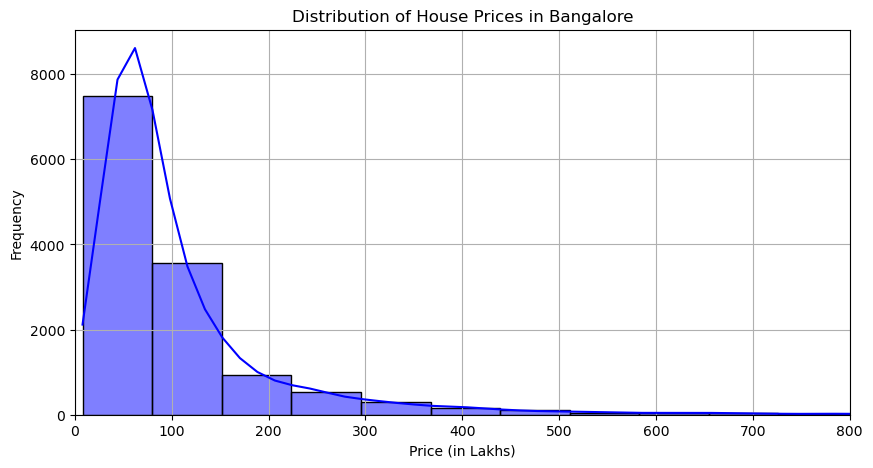

In [86]:
#Visualisation
# 1. Histoplot - Distribution of Prices in Bengalore
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.xlabel("Price (in Lakhs)")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices in Bangalore")
plt.xlim(0, 800) # Setting the range of x-axis from 0 to 800(in lakhs)
plt.grid(True)
plt.show()

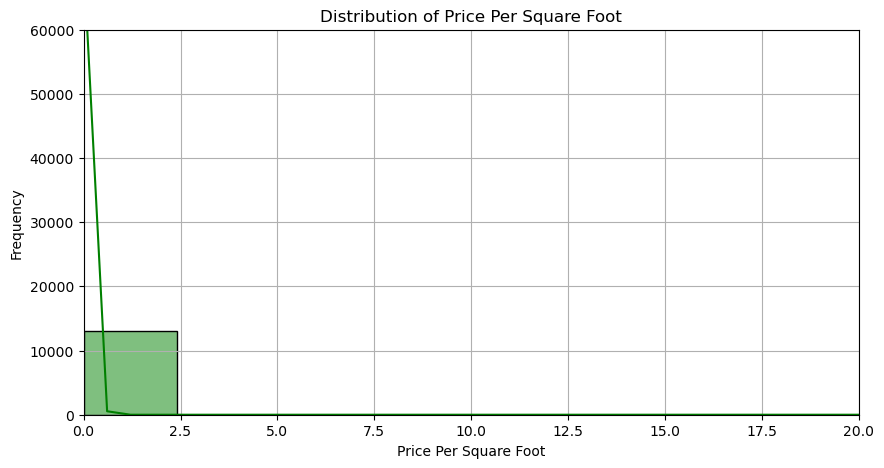

In [87]:
# 2. Histoplot - Distribution of prices per square foot
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

# Calculate price per square foot
df['price_per_sqft'] = df['price'] / df['total_sqft']


plt.figure(figsize=(10, 5))
sns.histplot(df['price_per_sqft'], bins=50, kde=True, color='green')
plt.xlabel("Price Per Square Foot")
plt.ylabel("Frequency")
plt.title("Distribution of Price Per Square Foot")
plt.xlim(0, 20) # Setting the range of x-axis from 0 to 20
plt.ylim(0,60000) # Setting the range of y-axis from 0 to 60000
plt.grid(True)
plt.show()

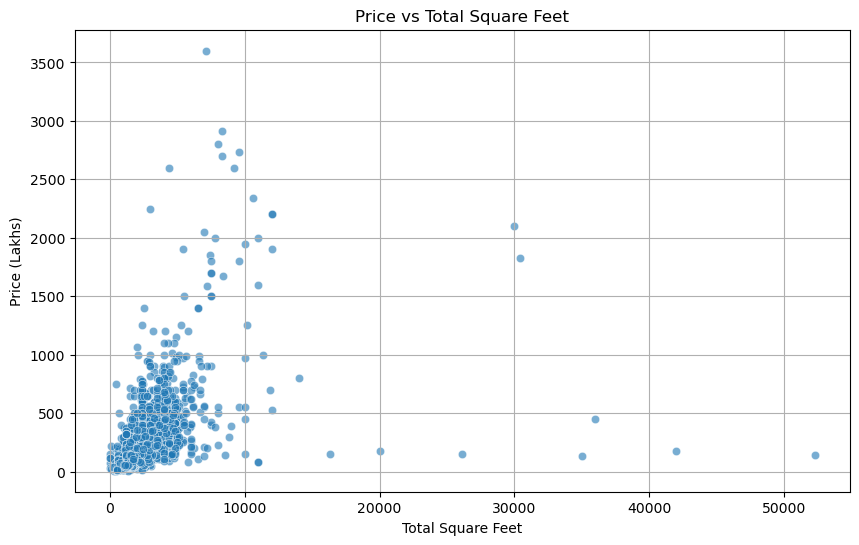

In [88]:
# 3. Scatter Plot - Price v/s Total Square Feet 

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['total_sqft'], y=df['price'], alpha=0.6)

plt.xlabel("Total Square Feet")
plt.ylabel("Price (Lakhs)")
plt.title("Price vs Total Square Feet")
plt.grid(True)
plt.show()

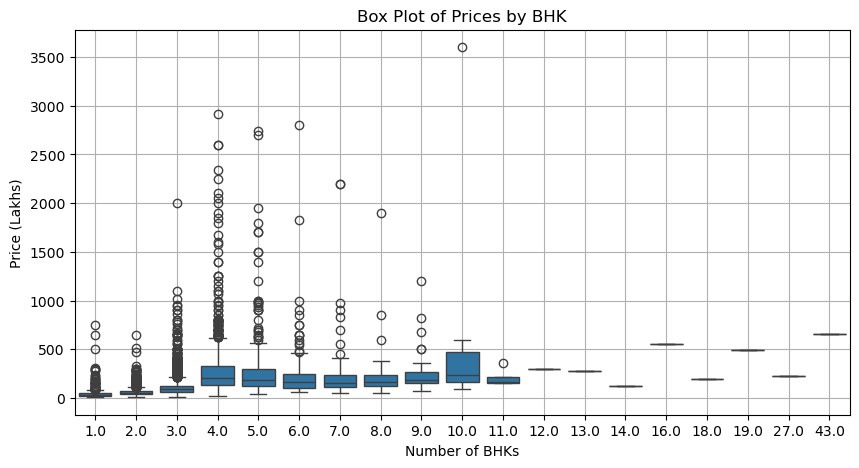

In [89]:
# 4. Box Plot - Prices by Number of Bedrooms (BHK)

# Convert 'size' column to string to avoid attribute error
df['size'] = df['size'].astype(str)

# Extract numeric values (BHK number) and convert to float
df['size'] = df['size'].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['size'], y=df['price'])
plt.xlabel("Number of BHKs")
plt.ylabel("Price (Lakhs)")
plt.title("Box Plot of Prices by BHK")
plt.grid(True)
plt.show()

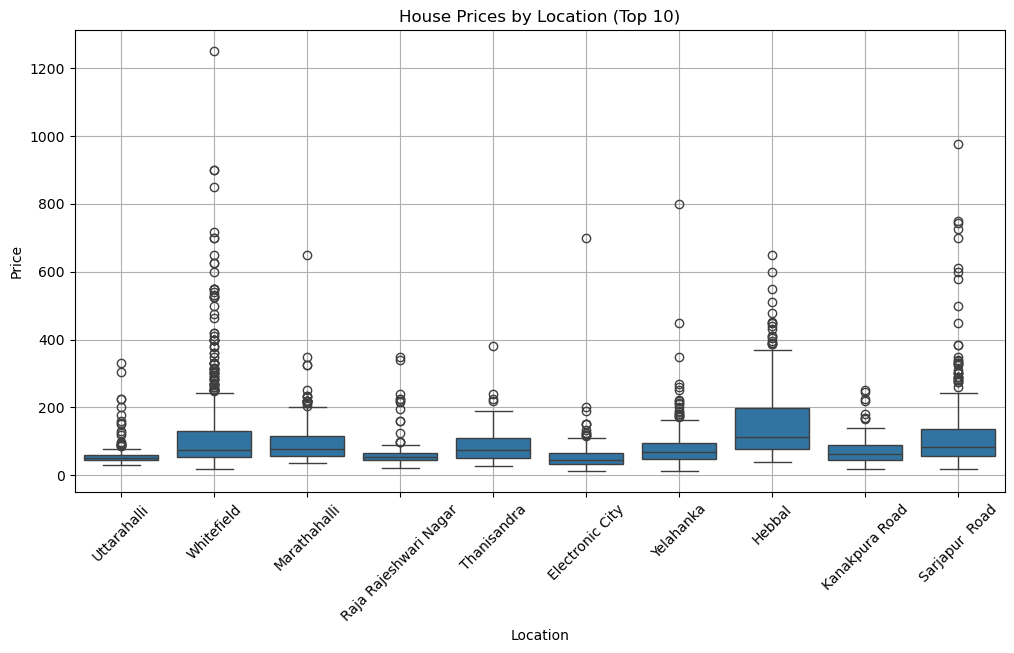

In [90]:
# 5. Box Plot - Price Distribution by Location (Top 10 Locations by Count)

# Get the top 10 most frequent locations in the dataset
top_locations = df['location'].value_counts().head(10).index

# Filter the original dataframe to include only these top 10 locations
df_top_locations = df[df['location'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='location', y='price', data=df_top_locations)
plt.xticks(rotation=45)  # Rotates x-axis labels by 45 degrees (prevents overlapping)
plt.xlabel("Location")
plt.ylabel("Price")
plt.title("House Prices by Location (Top 10)")
plt.grid(True)
plt.show()

In [91]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

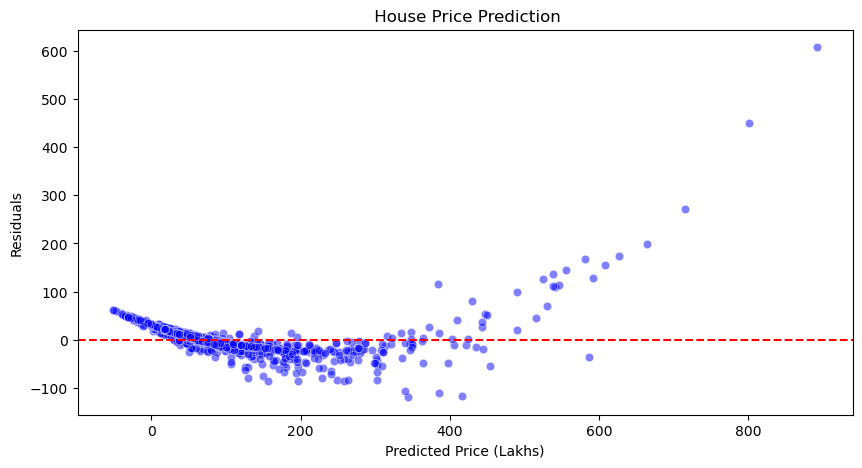

In [92]:
# 7. Residual plot- House Price Prediction

# Compute residuals (difference between actual and predicted values)
residuals = y_test - y_pred  

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5, color='blue')

# Add a horizontal reference line at y = 0 to indicate no error
plt.axhline(y=0, color='red', linestyle='--')  

plt.xlabel("Predicted Price (Lakhs)")
plt.ylabel("Residuals")
plt.title(" House Price Prediction")
plt.show()

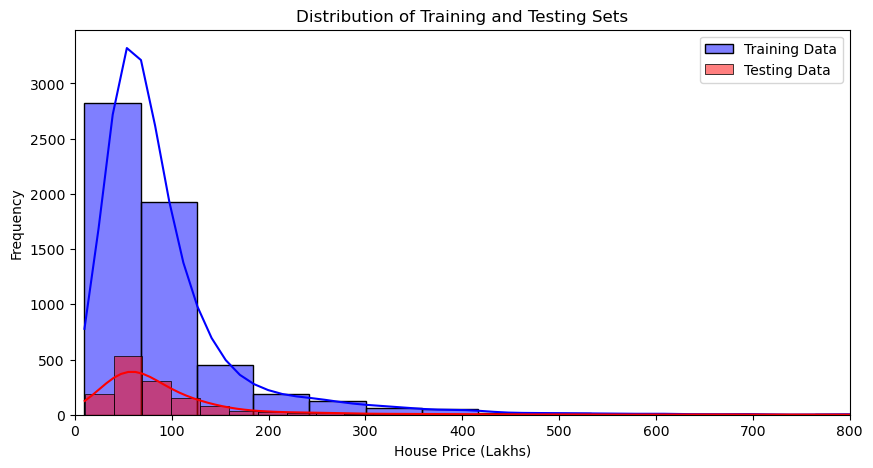

In [93]:
# 8.Visualizing the distribution of Training and Testing sets
plt.figure(figsize=(10,5))
sns.histplot(y_train, bins=50, color='blue', label="Training Data", kde=True)
sns.histplot(y_test, bins=50, color='red', label="Testing Data", kde=True)
plt.xlabel("House Price (Lakhs)")
plt.ylabel("Frequency")
plt.title("Distribution of Training and Testing Sets")
plt.xlim(0, 800)
plt.legend()
plt.show()

In [94]:
pip install pyttsx3

Note: you may need to restart the kernel to use updated packages.


In [95]:
#Decision Tree
#Decision Tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report

In [96]:
print(df.head()) #First 5 Rows Print

              area_type   availability                  location  size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II   2.0   
1            Plot  Area  Ready To Move          Chikka Tirupathi   4.0   
2        Built-up  Area  Ready To Move               Uttarahalli   3.0   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli   3.0   
4  Super built-up  Area  Ready To Move                  Kothanur   2.0   

   society  total_sqft  bath  balcony   price  price_per_sqft  
0  Coomee       1056.0   2.0      1.0   39.07        0.036998  
1  Theanmp      2600.0   5.0      3.0  120.00        0.046154  
2      NaN      1440.0   2.0      3.0   62.00        0.043056  
3  Soiewre      1521.0   3.0      1.0   95.00        0.062459  
4      NaN      1200.0   2.0      1.0   51.00        0.042500  


In [97]:
locations = df["location"].unique().tolist()

In [98]:
#Old Version
#FrontEnd  Completed BHP Project
#Full and final project and fully automated with location
'''import os
import numpy as np
import joblib
import tkinter as tk
import pyttsx3  # Import text-to-speech library
from tkinter import ttk, Toplevel, messagebox
from PIL import Image, ImageTk
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import joblib
import threading

# Initialize the text-to-speech engine
engine = pyttsx3.init()

# Load the trained model and scaler
model, scaler = joblib.load("house_price_model.pkl")

# Function to speak messages and then focus
def speak_message(message, callback=None):
    engine.say(message)
    engine.runAndWait()
    if callback:
        root.after(100, callback)  # Ensure callback executes immediately after speech

# Function to focus on entry field after speech
def focus_entry_location():
    
    entry_location.focus_force()  # Force focus immediately after speech

# Function to start speech and then focus
def speak_and_focus():
    # speak_message("Welcome to Bengaluru House Price Prediction")
    speak_message("Please enter the location", focus_entry_location)

# Function to handle Enter key press
def focus_next_entry(event, next_entry, message):
    if next_entry.winfo_exists():  # Check if widget exists before using .focus()
        next_entry.focus()
        root.after(500, lambda: speak_message(message))
    else:
        messagebox.showerror("Error", "Next entry field not found!")


# Function for smooth fading exit
def fade_out():
    alpha = root.attributes('-alpha')
    if alpha > 0:
        alpha -= 0.05
        root.attributes('-alpha', alpha)
        root.after(30, fade_out)
    else:
        root.destroy()

def exit_application():
    fade_out()


def calculate_price(event=None):
    try:
        location = entry_location.get()
        bath = float(entry_bath.get())
        #bath = 2.0
        balcony = float(entry_balcony.get())
        total_sqft = float(entry_sqft.get())
        bhk = float(entry_bhk.get())
        price_per_sqft = float(entry_price_per_sqft.get())
        #price_per_sqft = 10000
        area_type = entry_area_type.get()
        #area_type = "Super built-in"

        availability = "Ready To Move"
        #location = entry_location.get()
        # Define min-max constraints
        min_values = {"bath": 1, "balcony": 0, "total_sqft": 300, "bhk": 1, "price_per_sqft": 1000}
        max_values = {"bath": 10, "balcony": 5, "total_sqft": 10000, "bhk": 10, "price_per_sqft": 50000}

        # Validate input values
        if not (min_values["bath"] <= bath <= max_values["bath"]):
            messagebox.showerror("Error", "Number of bathrooms should be between 1 and 10.")
            return
        
        if not (min_values["balcony"] <= balcony <= max_values["balcony"]):
            messagebox.showerror("Error", "Number of balconies should be between 0 and 5.")
            return

        if not (min_values["total_sqft"] <= total_sqft <= max_values["total_sqft"]):
            messagebox.showerror("Error", "Total area should be between 300 sqft and 10,000 sqft.")
            return

        if not (min_values["bhk"] <= bhk <= max_values["bhk"]):
            messagebox.showerror("Error", "Number of BHK should be between 1 and 10.")
            return

        if not (min_values["price_per_sqft"] <= price_per_sqft <= max_values["price_per_sqft"]):
            messagebox.showerror("Error", "Price per sqft should be between ₹1000 and ₹50000.")
            return

        price = predict_house_price(lr, bath, balcony, total_sqft, bhk, price_per_sqft, area_type, availability, location)


        result_window = Toplevel(root)
        result_window.title("Prediction Result")
        result_window.state("zoomed")
        # Load and set the background image for result window
        result_image_path = r"Image2.png"
        if os.path.exists(result_image_path):
            try:
                result_bg_image = Image.open(result_image_path)
                screen_width = result_window.winfo_screenwidth()
                screen_height = result_window.winfo_screenheight()
                result_bg_image = result_bg_image.resize((screen_width, screen_height), Image.LANCZOS)
                result_bg_photo = ImageTk.PhotoImage(result_bg_image)

                result_bg_label = tk.Label(result_window, image=result_bg_photo)
                result_bg_label.place(x=0, y=0, width=screen_width, height=screen_height)
                result_bg_label.image = result_bg_photo
                
            except Exception as e:
                messagebox.showerror("Error", f"Failed to load result window image: {e}")

        result_frame = tk.Frame(result_window, bg="white", bd=2, relief="ridge")
        result_frame.place(relx=0.5, rely=0.5, anchor="center", width=600, height=450)

        icon_path = r"tick.png"
        if os.path.exists(icon_path):
            icon_image = Image.open(icon_path)
            icon_image = icon_image.resize((50, 50), Image.LANCZOS)
            icon_photo = ImageTk.PhotoImage(icon_image)
            icon_label = tk.Label(result_frame, image=icon_photo, bg="white")
            icon_label.image = icon_photo
            icon_label.pack(pady=5)
            
        columns = ("Property Aspect", "Value")
        tree = ttk.Treeview(result_frame, columns=columns, show="headings", height=150)
        
        # Define headings
        tree.heading("Property Aspect", text="Property Aspect", anchor="w")
        tree.heading("Value", text="Value", anchor="w")
        
        # Define column widths
        tree.column("Property Aspect", anchor="w", width=300)
        tree.column("Value", anchor="w", width=250)
        style = ttk.Style()
        style.configure("Treeview", font=("Lato", 20), rowheight=40)  # Increase font size
        style.configure("Treeview.Heading", font=("Montserrat", 25, "bold"))  # Make headers bold
        tree.tag_configure("highlight", background="#FFDDC1", font=("Montserrat", 20, "bold"))  # Change background of last row


        # Insert data into the table
        data = [
            ("Location", location),
            ("Bathroom", bath),
            ("Balcony", balcony),
            ("Total Area (sqft)", total_sqft),
            ("Bedrooms (BHK)", bhk),
            ("Price Per Sqft", f"₹{price_per_sqft}"),
            ("Area Type", area_type),
            # ("Estimated Price", f"₹{price:.2f} Lakhs")
        ]

        for item in data:
            tree.insert("", "end", values=item)

        tree.insert("", "end", values=("Estimated Price", f"₹{price:.2f} Lakhs"), tags=("highlight",))
        
        tree.pack(expand=True, fill="both", padx=10, pady=10)
        result_window.after(500, lambda: speak_message(f"The estimated price is {price:.2f} Lakhs"))

        # messagebox.showinfo("Predicted Price", f"Estimated Price: ₹{price:.2f} Lakhs")
    except Exception as e:
        messagebox.showerror("Error", str(e))

def speak_welcome_message(msg=None):
    speak_message(msg)
#-------------------------    

def add_placeholder(entry, placeholder_text):
    def on_focus_in(event):
        if entry_var.get() == placeholder_text:  # Remove placeholder on click
            entry_var.set("")
            entry.configure(font=("Arial", 12, "normal"), foreground="black")

    def on_focus_out(event):
        if not entry_var.get().strip():  # Restore placeholder if field is empty
            entry_var.set(placeholder_text)
            entry.configure(font=("Arial", 12, "italic"), foreground="gray")

    entry_var = tk.StringVar(value=placeholder_text)  # Default value = Placeholder

    entry.configure(textvariable=entry_var, font=("Arial", 12, "italic"), foreground="gray")
    entry.bind("<FocusIn>", on_focus_in)
    entry.bind("<FocusOut>", on_focus_out)

    return entry_var



def on_focus_in(event, entry, placeholder, message):
    if entry.get() == placeholder:
        entry.delete(0, tk.END)
        entry.config(fg="black")  # Change text color
    speak_message(message)

def on_focus_out(event, entry, placeholder):
    if entry.get() == "":
        entry.insert(0, placeholder)
        entry.config(fg="gray")
#--------------------------

# Create main window
root = tk.Tk()
root.title("Housing Price Estimator")
root.attributes('-alpha', 1)

screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
root.geometry(f"{screen_width}x{screen_height}")

image_path = r"BEngaluru.png"
if os.path.exists(image_path):
    try:
        bg_image = Image.open(image_path)
        
        # Get current screen size
        screen_width = root.winfo_screenwidth()
        screen_height = root.winfo_screenheight()
        
        # Resize image to fit the window
        bg_image = bg_image.resize((screen_width, screen_height), Image.LANCZOS)
        bg_photo = ImageTk.PhotoImage(bg_image)

        bg_label = tk.Label(root, image=bg_photo)
        bg_label.place(x=0, y=0, width=screen_width, height=screen_height)
        
        # Keep reference to avoid garbage collection
        bg_label.image = bg_photo  
        
    except Exception as e:
        messagebox.showerror("Error", f"Failed to load image: {e}")
else:
    messagebox.showerror("Error", "Image file not found! Please check the path and try again.")
root.after(300, lambda : speak_welcome_message("Welcome to Bengaluru House Price Prediction"))
# Speak the input prompt and ensure cursor blinks
root.after(3000, speak_and_focus)



canvas = tk.Canvas(root, bg="#313864", highlightthickness=0)
canvas.place(relx=0.78, rely=0.5, anchor="center", width=400, height=600)

frame = tk.Frame(canvas, bg='#313864', bd=0)
frame.place(relx=0, rely=0, relwidth=1, relheight=1)



tk.Label(frame, text="Enter Location:", font=("Montserrat", 14), bg="#313864",fg="white").pack(pady=2)


entry_location = ttk.Combobox(frame, font=("Arial", 12), justify="center")
entry_location.pack(fill="x", padx=10, pady=5, ipady=5)
entry_location['values'] = locations  # Initial values
entry_location.set("")  # Default empty selection
entry_location.bind("<FocusIn>", lambda event: on_focus_in(event, entry_location, "Enter Location", "Please enter the location"))
entry_location.bind("<FocusOut>", lambda event: on_focus_out(event, entry_location, "Enter Location"))


tk.Label(frame, text="Enter Area(sqft):", font=("Montserrat", 14), bg="#313864",fg="white").pack(pady=2)
entry_sqft = tk.Entry(frame, font=("Arial", 12),justify="center")
entry_sqft.pack(fill="x", padx=10, pady=0.5, ipady=5)



tk.Label(frame, text="Enter Price per sqft:", font=("Montserrat", 14), bg="#313864",fg="white").pack(pady=2)
entry_price_per_sqft = tk.Entry(frame, font=("Arial", 12),justify="center")
entry_price_per_sqft.pack(fill="x", padx=10, pady=0.5, ipady=5)



tk.Label(frame, text="Enter area type:", font=("Montserrat", 14), bg="#313864",fg="white").pack(pady=2)





def on_key_release(event):
    #Filters dropdown options based on user input.
    typed_text = entry_area_type.get().lower()
    
    # Filter matching values
    filtered_values = [item for item in area_types if typed_text in item.lower()]
    
    # Update dropdown values
    entry_area_type['values'] = filtered_values
    
    # Open dropdown to show suggestions
    entry_area_type.event_generate('<Down>')


    typed_text = entry_location.get().lower()
    
    # Filter matching values
    filtered_values = [item for item in locations if typed_text in item.lower()]
    
    # Update dropdown values
    entry_location['values'] = filtered_values
    
    # Open dropdown to show suggestions
    entry_location.event_generate('<Down>')

area_types = ["Super built-up", "Built-up", "Carpet area", "Plot area"]
locations = df["location"].unique().tolist()


# Dropdown with typing support
entry_area_type = ttk.Combobox(frame, font=("Arial", 12), justify="center")
entry_area_type.pack(fill="x", padx=10, pady=0.5, ipady=5)
entry_area_type['values'] = area_types  # Initial values
entry_area_type.set("")  # Default empty selection


tk.Label(frame, text="Enter Number of BHK:", font=("Montserrat", 14), bg="#313864",fg="white").pack(pady=2)
entry_bhk = tk.Entry(frame, font=("Arial", 12),justify="center")
entry_bhk.pack(fill="x", padx=10, pady=0.5, ipady=5)
#entry_bhk.bind("<Return>", lambda event: focus_next_entry(event, entry_bath, "Please enter the Number of Bathrooms"))
    
tk.Label(frame, text="Enter Bathrooms:", font=("Montserrat", 14), bg="#313864",fg="white").pack(pady=2)
entry_bath = tk.Entry(frame, font=("Arial", 12),justify="center")
entry_bath.pack(fill="x", padx=10, pady=0.5, ipady=5)

#entry_bath.bind("<Return>", lambda event: focus_next_entry(event, entry_balcony, "Please enter the Balconies"))

tk.Label(frame, text="Enter Number of Balconies:", font=("Montserrat", 14), bg="#313864",fg="white").pack(pady=2)
entry_balcony = tk.Entry(frame, font=("Arial", 12),justify="center")
entry_balcony.pack(fill="x", padx=10, pady=0.5, ipady=5)
entry_balcony.bind("<FocusIn>", lambda event: speak_message("Please enter the number of balconies"))
#entry_balcony.bind("<Return>", calculate_price)

entry_location.bind("<FocusIn>", lambda event: speak_message("Please enter the location"))
entry_sqft.bind("<FocusIn>", lambda event: speak_message("Please enter the square feet area"))
entry_price_per_sqft.bind("<FocusIn>", lambda event: speak_message("Please enter Price Per Square Feet"))
entry_area_type.bind("<FocusIn>", lambda event: speak_message("Please enter the type of area you want"))
entry_bhk.bind("<FocusIn>", lambda event: speak_message("Please enter number of BHK"))
entry_bath.bind("<FocusIn>", lambda event: speak_message("Please enter the number of bathrooms"))
entry_balcony.bind("<FocusIn>", lambda event: speak_message("Please enter the number of balconies"))

# Apply placeholder behavior
add_placeholder(entry_location, "Enter or select a location")
add_placeholder(entry_sqft, "Enter total area in sqft(300-10000)")
add_placeholder(entry_price_per_sqft, "Enter price per sqft (1000-50000)")
add_placeholder(entry_area_type, "Choose an area type (e.g., Carpet, Built-up)")
add_placeholder(entry_bhk, "Enter the number of BHK units(1-10)")
add_placeholder(entry_bath, "Enter the number of bathrooms (1-10)")
add_placeholder(entry_balcony, "Enter the number of balconies (0-5)")

    

#Threading
def speak_message(message, callback=None):
    def run_speech():
        engine.say(message)
        engine.runAndWait()
        if callback:
            root.after(100, callback)  # Ensure callback executes immediately after speech

    speech_thread = threading.Thread(target=run_speech)
    speech_thread.daemon = True  # Allows the thread to exit when the program closes
    speech_thread.start()


calculate_button = tk.Button(frame, text="Calculate Housing Price", font=("Arial", 12, "bold"), bg="#4CAF50", fg="white", command=calculate_price)
calculate_button.pack(fill="x", padx=10, pady=10, ipady=5)

exit_button = tk.Button(frame, text="Exit", font=("Arial", 14, "bold"), bg="red", fg="white", command=exit_application)
exit_button.pack(side="bottom", fill="x", padx=10, pady=0.5, ipady=5)

#exit_button.pack(pady=0,ipady=2)

root.mainloop()'''

'import os\nimport numpy as np\nimport joblib\nimport tkinter as tk\nimport pyttsx3  # Import text-to-speech library\nfrom tkinter import ttk, Toplevel, messagebox\nfrom PIL import Image, ImageTk\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.ensemble import RandomForestRegressor\nimport joblib\nimport threading\n\n# Initialize the text-to-speech engine\nengine = pyttsx3.init()\n\n# Load the trained model and scaler\nmodel, scaler = joblib.load("house_price_model.pkl")\n\n# Function to speak messages and then focus\ndef speak_message(message, callback=None):\n    engine.say(message)\n    engine.runAndWait()\n    if callback:\n        root.after(100, callback)  # Ensure callback executes immediately after speech\n\n# Function to focus on entry field after speech\ndef focus_entry_location():\n    \n    entry_location.focus_force()  # Force focus immediately after speech\n\n# Function to start speech and then focus\ndef speak_and_focus():\n    # speak_message("Welcome to 

In [ ]:
#New Version
import os
import numpy as np
import joblib
import tkinter as tk
import pyttsx3  # Import text-to-speech library
from tkinter import ttk, Toplevel, messagebox
from PIL import Image, ImageTk
import threading

# Initialize the text-to-speech engine
engine = pyttsx3.init()

# Load the trained model and scaler
model, scaler = joblib.load("house_price_model.pkl")

# Function to speak messages and then focus
def speak_message(message, callback=None):
    def run_speech():
        engine.say(message)
        engine.runAndWait()
        if callback:
            root.after(100, callback)  # Ensure callback executes immediately after speech

    speech_thread = threading.Thread(target=run_speech)
    speech_thread.daemon = True  # Allows the thread to exit when the program closes
    speech_thread.start()

# Function to focus on entry field after speech
def focus_entry_location():
    entry_location.focus_force()  # Force focus immediately after speech

# Function to start speech and then focus
def speak_and_focus():
    speak_message("Please enter the location", focus_entry_location)

# Function for smooth fading exit
def fade_out():
    alpha = root.attributes('-alpha')
    if alpha > 0:
        alpha -= 0.05
        root.attributes('-alpha', alpha)
        root.after(30, fade_out)
    else:
        root.destroy()

def exit_application():
    fade_out()

def calculate_price(event=None):
    try:
        location = entry_location.get()
        bath = float(entry_bath.get())
        balcony = float(entry_balcony.get())
        total_sqft = float(entry_sqft.get())
        bhk = float(entry_bhk.get())
        price_per_sqft = float(entry_price_per_sqft.get())
        area_type = entry_area_type.get()
        availability = "Ready To Move"

        # Define min-max constraints
        min_values = {"bath": 1, "balcony": 0, "total_sqft": 1000, "bhk": 1, "price_per_sqft": 5000}
        max_values = {"bath": 10, "balcony": 5, "total_sqft": 10000, "bhk": 10, "price_per_sqft": 50000}

        # Validate input values
        if not (min_values["bath"] <= bath <= max_values["bath"]):
            messagebox.showerror("Error", "Number of bathrooms should be between 1 and 10.")
            return
        
        if not (min_values["balcony"] <= balcony <= max_values["balcony"]):
            messagebox.showerror("Error", "Number of balconies should be between 0 and 5.")
            return

        if not (min_values["total_sqft"] <= total_sqft <= max_values["total_sqft"]):
            messagebox.showerror("Error", "Total area should be between 1000 sqft and 10,000 sqft.")
            return

        if not (min_values["bhk"] <= bhk <= max_values["bhk"]):
            messagebox.showerror("Error", "Number of BHK should be between 1 and 10.")
            return

        if not (min_values["price_per_sqft"] <= price_per_sqft <= max_values["price_per_sqft"]):
            messagebox.showerror("Error", "Price per sqft should be between ₹5000 and ₹50000.")
            return

        # Assuming predict_house_price is defined elsewhere
        price = predict_house_price(lr, bath, balcony, total_sqft, bhk, price_per_sqft, area_type, availability, location)

        result_window = Toplevel(root)
        result_window.title("Prediction Result")
        result_window.state("zoomed")
# --------------------------------------
        result_image_path = r"Image2.png"
        if os.path.exists(result_image_path):
            try:
                result_bg_image = Image.open(result_image_path)
                screen_width = result_window.winfo_screenwidth()
                screen_height = result_window.winfo_screenheight()
                result_bg_image = result_bg_image.resize((screen_width, screen_height), Image.LANCZOS)
                result_bg_photo = ImageTk.PhotoImage(result_bg_image)

                result_bg_label = tk.Label(result_window, image=result_bg_photo)
                result_bg_label.place(x=0, y=0, width=screen_width, height=screen_height)
                result_bg_label.image = result_bg_photo
                
            except Exception as e:
                messagebox.showerror("Error", f"Failed to load result window image: {e}")      
# --------------------------------------

        result_frame = tk.Frame(result_window, bg="white", bd=2, relief="ridge")
        result_frame.place(relx=0.5, rely=0.5, anchor="center", width=600, height=450)
# 2b--------------------------------------
        icon_path = r"tick.png"
        if os.path.exists(icon_path):
            icon_image = Image.open(icon_path)
            icon_image = icon_image.resize((50, 50), Image.LANCZOS)
            icon_photo = ImageTk.PhotoImage(icon_image)
            icon_label = tk.Label(result_frame, image=icon_photo, bg="white")
            icon_label.image = icon_photo
            icon_label.pack(pady=5)

# 2b--------------------------------------
        columns = ("Property Aspect", "Value")
        tree = ttk.Treeview(result_frame, columns=columns, show="headings", height=150)
        
        # Define headings
        tree.heading("Property Aspect", text="Property Aspect", anchor="w")
        tree.heading("Value", text="Value", anchor="w")

        # Define column widths
        tree.column("Property Aspect", anchor="w", width=300)
        tree.column("Value", anchor="w", width=250)
        style = ttk.Style()
        style.configure("Treeview", font=("Lato", 20), rowheight=40)  # Increase font size
        style.configure("Treeview.Heading", font=("Montserrat", 25, "bold"))  # Make headers bold
        tree.tag_configure("highlight", background="#FFDDC1", font=("Montserrat", 20, "bold"))  # Change background of last row

        
        # Insert data into the table
        data = [
            ("Location", location),
            ("Bathroom", bath),
            ("Balcony", balcony),
            ("Total Area (sqft)", total_sqft),
            ("Bedrooms (BHK)", bhk),
            ("Price Per Sqft", f"₹{price_per_sqft}"),
        ]

        for item in data:
            tree.insert("", "end", values=item)

        tree.insert("", "end", values=("Estimated Price", f"₹{price:.2f} Lakhs"),tags=("highlight",))
        tree.pack(expand=True, fill="both", padx=10, pady=10)
        threading.Thread(target=speak_message, args=(f"The estimated price is {price:.2f} Lakhs",)).start()
        calculate_button.bind("<FocusIn>", lambda event: speak_message(f"The estimated price is {price:.2f} Lakhs"))
        #result_window.after(500, lambda: speak_message(f"The estimated price is {price:.2f} Lakhs"))
        #result_window.after(500, lambda: speak_message(f"The estimated price is {price:.2f} Lakhs"))

    except Exception as e:
        messagebox.showerror("Error", str(e))

def add_placeholder(entry, placeholder_text):
    def on_focus_in(event):
        if entry_var.get() == placeholder_text:  # Remove placeholder on click
            entry_var.set("")
            entry.configure(font=("Arial", 12, "normal"), foreground="black")

    def on_focus_out(event):
        if not entry_var.get().strip():  # Restore placeholder if field is empty
            entry_var.set(placeholder_text)
            entry.configure(font=("Arial", 12, "italic"), foreground="gray")

    entry_var = tk.StringVar(value=placeholder_text)  # Default value = Placeholder
    entry.configure(textvariable=entry_var, font=("Arial", 12, "italic"), foreground="gray")
    entry.bind("<FocusIn>", on_focus_in)
    entry.bind("<FocusOut>", on_focus_out)

# Create main window
root = tk.Tk()
root.title("Housing Price Estimator")
root.attributes('-alpha', 1)

screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
root.geometry(f"{screen_width}x{screen_height}")

# Background image
image_path = r"BEngaluru.png"
if os.path.exists(image_path):
    bg_image = Image.open(image_path)
    bg_image = bg_image.resize((screen_width, screen_height), Image.LANCZOS)
    bg_photo = ImageTk.PhotoImage(bg_image)
    bg_label = tk.Label(root, image=bg_photo)
    bg_label.place(x=0, y=0, width=screen_width, height=screen_height)
    bg_label.image = bg_photo  


root.after(300, lambda: speak_message("Welcome to Bengaluru House Price Prediction"))
root.after(3000, speak_and_focus)

canvas = tk.Canvas(root, bg="#313864", highlightthickness=0)
canvas.place(relx=0.78, rely=0.5, anchor="center", width=400, height=600)

frame = tk.Frame(canvas, bg='#313864', bd=0)
frame.place(relx=0, rely=0, relwidth=1, relheight=1)

def on_key_release(event):
    #Filters dropdown options based on user input.
    typed_text = entry_area_type.get().lower()
    
    # Filter matching values
    filtered_values = [item for item in area_types if typed_text in item.lower()]
    
    # Update dropdown values
    entry_area_type['values'] = filtered_values
    
    # Open dropdown to show suggestions
    entry_area_type.event_generate('<Down>')


    typed_text = entry_location.get().lower()
    
    # Filter matching values
    filtered_values = [item for item in locations if typed_text in item.lower()]
    
    # Update dropdown values
    entry_location['values'] = filtered_values
    
    # Open dropdown to show suggestions
    entry_location.event_generate('<Down>')


tk.Label(frame, text="Enter Location:", font=("Montserrat", 14), bg="#313864", fg="white").pack(pady=2)
entry_location = ttk.Combobox(frame, font=("Arial", 12), justify="center")
entry_location.pack(fill="x", padx=10, pady=5, ipady=5)
entry_location['values'] = locations  # Populate with actual locations
entry_location.set("")  # Default empty selection
#entry_location.bind("<FocusIn>", lambda event: speak_message("Please enter the location"))
add_placeholder(entry_location, "Enter or select a location")
entry_location.bind("<Enter>", lambda event: speak_message("Please enter or select the location"))

tk.Label(frame, text="Enter Area(sqft):", font=("Montserrat", 14), bg="#313864", fg="white").pack(pady=2)
entry_sqft = tk.Entry(frame, font=("Arial", 12), justify="center")
entry_sqft.pack(fill="x", padx=10, pady=0.5, ipady=5)
add_placeholder(entry_sqft, "Enter total area in sqft (1000-10000)")
entry_sqft.bind("<Enter>", lambda event: speak_message("Please enter the Area in Square Feet"))

tk.Label(frame, text="Enter Price per sqft:", font=("Montserrat", 14), bg="#313864", fg="white").pack(pady=2)
entry_price_per_sqft = tk.Entry(frame, font=("Arial", 12), justify="center")
entry_price_per_sqft.pack(fill="x", padx=10, pady=0.5, ipady=5)
add_placeholder(entry_price_per_sqft, "Enter price per sqft (5000-50000)")
entry_price_per_sqft.bind("<Enter>", lambda event: speak_message("Please enter the Price per Square Feet"))

tk.Label(frame, text="Enter area type:", font=("Montserrat", 14), bg="#313864", fg="white").pack(pady=2)
entry_area_type = ttk.Combobox(frame, font=("Arial", 12), justify="center")
entry_area_type.pack(fill="x", padx=10, pady=0.5, ipady=5)
entry_area_type['values'] = ["Super built-up", "Built-up", "Carpet area", "Plot area"]
entry_area_type.set("")  # Default empty selection
add_placeholder(entry_area_type, "Choose an area type (e.g., Carpet, Built-up)")
entry_area_type.bind("<Enter>", lambda event: speak_message("Please enter or select the Area Type"))

tk.Label(frame, text="Enter Number of BHK:", font=("Montserrat", 14), bg="#313864", fg="white").pack(pady=2)
entry_bhk = tk.Entry(frame, font=("Arial", 12), justify="center")
entry_bhk.pack(fill="x", padx=10, pady=0.5, ipady=5)
add_placeholder(entry_bhk, "Enter the number of BHK units (1-10)")
entry_bhk.bind("<Enter>", lambda event: speak_message("Please enter the Number of BHK"))

tk.Label(frame, text="Enter Bathrooms:", font=("Montserrat", 14), bg="#313864", fg="white").pack(pady=2)
entry_bath = tk.Entry(frame, font=("Arial", 12), justify="center")
entry_bath.pack(fill="x", padx=10, pady=0.5, ipady=5)
add_placeholder(entry_bath, "Enter the number of bathrooms (1-10)")
entry_bath.bind("<Enter>", lambda event: speak_message("Please enter the number of bathrooms"))

tk.Label(frame, text="Enter Number of Balconies:", font=("Montserrat", 14), bg="#313864", fg="white").pack(pady=2)
entry_balcony = tk.Entry(frame, font=("Arial", 12), justify="center")
entry_balcony.pack(fill="x", padx=10, pady=0.5, ipady=5)
add_placeholder(entry_balcony, "Enter the number of balconies (0-5)")
entry_balcony.bind("<Enter>", lambda event: speak_message("Please enter the number of balconies"))

# Bind the calculate button to speak when clicked
calculate_button = tk.Button(frame, text="Calculate Housing Price", font=("Arial", 12, "bold"), bg="#4CAF50", fg="white", command=calculate_price)
calculate_button.pack(fill="x", padx=10, pady=10, ipady=5)
calculate_button.bind("<Enter>", lambda event: speak_message("Click to calculate the housing price"))

# Bind the exit button to speak when clicked
exit_button = tk.Button(frame, text="Exit", font=("Arial", 14, "bold"), bg="red", fg="white", command=exit_application)
exit_button.pack(side="bottom", fill="x", padx=10, pady=0.5, ipady=5)
exit_button.bind("<Enter>", lambda event: speak_message("Click to exit the application"))

root.mainloop()

Exception in thread Thread-9 (run_speech):
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "C:\Users\Lenovo\anaconda3\Lib\threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7928\4185950568.py", line 21, in run_speech
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-11 (run_speech):
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "C:\Users\Lenovo\anaconda3\Lib\threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7928\4185950568.py", line 21, in run_speech
  File "C:\Users\Lenovo\anacond